# Laboratorio 1

integrantes: 

    - Francis Aguilar - 22243 
    - Diego García - 22404 
    - Angela García -22869 

enlace al repositorio: https://github.com/angelargd8/lab1-modsim


# Ejercicio 1 - Fundamentos de Sistemas de Stock y Flujo

## Teoría 
1. **Definición de:**

    a. **Stock**
        Estas son las cantidades acumuladas de algo en algun sistema en un momento dado. Estos representan el estado del sistema y son variables que cambian lentamente con el tiempo
    
    b. **Flujo**
        Los fujos o las tasas de cambio, son las tasas de entrada o salida que modifican los stocks, estos van expresando cómo es que cambian los stocks por el largo del tiempo, este es positivo si aumenta y negativa si disminuye.

    c. **Bucle de retroalimentación**
        Este es un buble de causa y efecto, en donde los cambios en un stock afectan a los flujos y estos afectan a los stocks. 


2. **Definición con notación matemática y explicación de:**
    
    a. **Ecuación de acumulación de stock**

    Un stock $$S(t) $$ en cualquier sistema dinámico es: 


    $$
    S(t) = S(t_0) + \int_{t_0}^{t} \left[\text{Entradas}(\tau) - \text{Salidas}(\tau)\right] \, d\tau
    $$
    
    Y en su forma diferencial: 

    $$
    \frac{dS(t)}{dt} = \text{Entradas}(t) - \text{Salidas}(t)
    $$

    Esto es porque el stock en un momento t es igual a su valor inicial más la acumulación neta de flujos a lo largo dle tiempo


    b. **Análisis dimensional de tasa de flujo**

    Si el stock tiene dimensión [S], su flujo F tiene:

    $$
    [F] = \frac{[S]}{[T]}
    $$

    [S]: unidades del stock

    [T]: unidad de tiempo
    
    c. **Forma de solución de decaimiento exponencial**

    Si un stock solo pierde cantidad proporcionalmente a su tamaño (sin entradas):

    $$
    \frac{dS(t)}{dt} = -k \, S(t)
    $$

    donde \( k > 0 \) es la constante de decaimiento \(( [k] = 1/[T] )\).

    
    la solución sería:

    $$
    S(t) = S_0 \, e^{-k t}
    $$


3. **Comparación y explicación de las diferencias de:**
    
    a. **Modelado de tiempo contínuo vs modelado de tiempo discreto** 

    | **Modelado de tiempo continuo** | **Modelado de tiempo discreto** |
    |---------------------------------|---------------------------------|
    | El tiempo se representa con una variable continua | El tiempo se divide en intervalos fijos |
    | se usan ecuaciones diferenciales para describir el cambio | se usan ecuaciones en diferencias o en iteraciones paso a paso |
    | Es util para sistemas en donde los cambios son constantes | Es útil cuando los cambios ocurren en eventos puntuales |



    
    b. **Retroalimentación balanceada vs reforzada**

    | **Retroalimentación balanceada** | **Retroalimentación reforzada** |
    |---------------------------------|---------------------------------|
    | Estabiliza el sistema y lo mantiene en equilibrio | Amplifica los cacmbios y genera un crecimiento o decrecimiento acelerado |
    | Actua como un mecanismo regulador, corrige desviaciones y busca un objetivo o estado estable | actua como un mecanismo amplificador, los pequeños cambios se vuelven mayores|
    | Condice a un equilibrio dinámico o a una oscilación controlada | Puede llevar a un crecimeinto exponencial o un colapso si no se regula|



4. **Interprete el significado de la constante de tiempo τ=1/α en sistemas del mundo real (por ejemplo, descomposición de la población, metabolismo de fármacos).**
    la constante de tiempo τ=1/α en sistemas del mundo real, el el caso que τ sea muy pequeño el sistema responde rápido, como una descomposición de la población rápida, un fármaco que se elimina más rápido del metabolismo. Y si es grande, entonces pues el sistema responde lento. Que se descomene lenta la población y el fármaco permanece más tiempo en el metabolismo




## **Referencias**: 
- Bucle de retroalimentación: Definición y ejemplos. (2020, noviembre 11). Estudyando. https://estudyando.com/bucle-de-retroalimentacion-definicion-y-ejemplos/
- ¿Cómo se incorporan los bucles de retroalimentación y los retrasos en los diagramas de stock y flujo? (s. f.). Recuperado 15 de julio de 2025, de https://es.linkedin.com/advice/1/how-do-you-incorporate-feedback-loops-delays-stock?lang=es
- Dinámica de sistemas _ AcademiaLab. (s. f.). Recuperado 15 de julio de 2025, de https://academia-lab.com/enciclopedia/dinamica-de-sistemas/


-------------
Enlace para probar las fórmulas en jupyter: https://www.mathjax.org/#demo

### Práctica - parte 1
Disminución de la población debido a una tasa de mortalidad constante

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# modelo stock-flujo

#poblacion inicial 
S0 = 1000  # Susceptibles
#tasa de mortalidad 
a = 0.01 
#horizonte de tiempo, meses
T = 24
#requerimientos
#integracion de euler con pasos discretos 
dt=0.1

#tiempo
t_values= np.arange(0, T+dt, dt)

#solucion numerica - euler
S_values=[S0]
for t in t_values[1:]:
    dS= -a*S_values[-1]
    S_values.append(S_values[-1] + dS * dt)

#solucion analitica
S_analytic=S0*np.exp(-a *t_values)


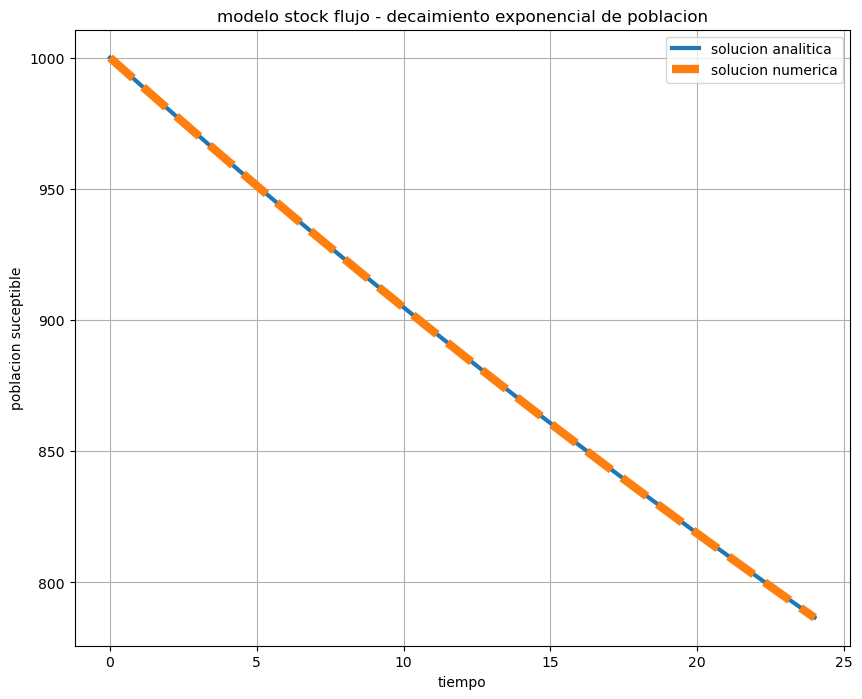

In [15]:
#comparar la solucion analitica
#graficar la solucion numerica y analitica
plt.figure(figsize=(10,8))
plt.title("modelo stock flujo - decaimiento exponencial de poblacion")
plt.plot(t_values, S_analytic, label="solucion analitica", linewidth=3)
plt.plot(t_values, S_values, label="solucion numerica", linestyle="--", linewidth=6)

plt.xlabel("tiempo")
plt.ylabel("poblacion suceptible")
plt.legend()
plt.grid(True)
plt.show()


a. ¿Cómo altera la vacunación los ciclos de retroalimentación?

La vacunación, agrega un flujo que reduce el stock de suceptibles y lo pasa a otro stock. Esto es porque en un modelo sin vacunación, los suceptibles solo disminuyen si contraen la infección o por mortalidad. Entonces, la vacunación, debilita el ciclo de "más infectados -> más transmisión -> más infectados", porque debilita el número de susceptibles disponibles para ser infectados. Y a largo plazo, el sistema puede alcanzar un equilibrio con una proporción menor de infectados o eliminar la propagación si el grupo llega a ser inmune. 

b. ¿Cuál es el valor mínimo de v para prevenir un brote? 

El valor mínimo debe de ser $$R_e$$ menor que 1. 
usando la formula de 
$$
R_e = R_0 * (1-p) < 1
$$
En donde

$$
R_e : \text{es el número reproductivo basico}
$$ 


$$
p : \text{proporción de individuos inmunes}
$$ 


$$
(1-p) : \text{proporción suceptibles en la población}
$$ 


al despejar la proporción inmune necesaria: 

$$
R_0 \cdot (1 - p) < 1
$$


$$
1 - p < \frac{1}{R_0}
$$

$$
p > 1 - \frac{1}{R_0}
$$

Entonces,  la proporción mínima inmunizada es:

$$
p_{\text{mín}} = 1 - \frac{1}{R_0}
$$

Si se asume que toda la inmunidad proviene de la vacunación y que la vacuna es 100% efectiva, entonces: 

$$
v_{\text{mín}} = p_{\text{mín}} = 1 - \frac{1}{R_0}
$$




# Ejercicio 2 - Bucles de retroalimentación y dinámica no lineal

## Teoría

1. __Describa cómo los bucles de retroalimentación crean:__<br>
    __a. Crecimiento exponencial (bucle de refuerzo)__<br>
    Se crea cuando una acción causa un efecto que potencia el resultado final de la misma acción. Esto debido a que dicho efecto, influye positivamente en esa acción inicial. Por ejemplo, más nacimientos aumentan la población, lo que genera aún más nacimientos. 

    __b. Equilibrio (bucle de equilibrio)__<br>
    Se crea cuando una acción causa un efecto que es contrario a la acción inicial. Esto hace que el efecto a largo plazo de esa acción, no siga aumentando, sino que regrese a un mismo punto. Por ejemplo, el aumento en el precio de algo causa que las personas lo compren menos, lo que causa que su precio baje.

2. __Analice el modelo epidémico SIR:__<br>
    __a. Etiquete todos los stocks/flujos del sistema.__<br>
    Stocks:<br>
    S: es el susceptible o que puede contagiarse <br>
    I: el infectado que puede transmitir la enfermedad <br>
    R: la persona ya que se recupero y no se puede volver a contagiar <br>

    Flujos:<br>
    Tasa de infección: personas que pasan de S a I<br>
    Tasa de recuperación: personas que pasan de I a R

    __b. Identifique los bucles de retroalimentación que rigen la propagación de la infección.__<br>
    De refuerzo: mientras más infectados hayan, más personas suceptibles podrán contagiar, lo que a su vez aumenta la cantidad de infectados existentes.<br>
    De equilibrio: como los recuperados ya no se pueden volver a infectar, más infectados causa que hayan más recuperados y por lo tanto, menos personas que puedan ser infectadas.

3. __Explique por qué los sistemas no lineales (p. ej., Flujo = βSI) requiere simulación numérica.__<br>
Estos sistemas no se pueden resolver con fórmulas exactas, pues el cambio no es proporcional ni constante. Esto quiere decir que la relación entre las varibles cambia al mismo tiempo que estas lo hacen. La simulación numérica ayuda a resolver esto, ya que no permite calcular paso a paso cómo evoluciona el sistema en el tiempo, sin generalizar todo el sistema. 

## Práctica

#### 1. Análisis del modelo:
a. Stocks: <br>
    S: es el susceptible o que puede contagiarse <br>
    I: el infectado que puede transmitir la enfermedad <br>
    R: la persona ya que se recupero y no se puede volver a contagiar <br>

b. Flujos: <br>
    Infección (βSI): Personas que pasan de S a I por estar en contacto con un I.<br>
    Recuperación (γI): Personas que pasan de I a R. Estas personas ya no se pueden volver a contagiar. <br>
    Vacunación (vS): Personas S que se vacunan por lo que se vuelven inmunes y pasan directamente a R. <br>

c. Parámetros: <br>
    β = 0.3: Tasa de contacto infeccioso
    γ = 0.1: Tasa de recuperación
    v = 0.05: Tasa de vacunación de la población susceptible


#### 2. Implementación

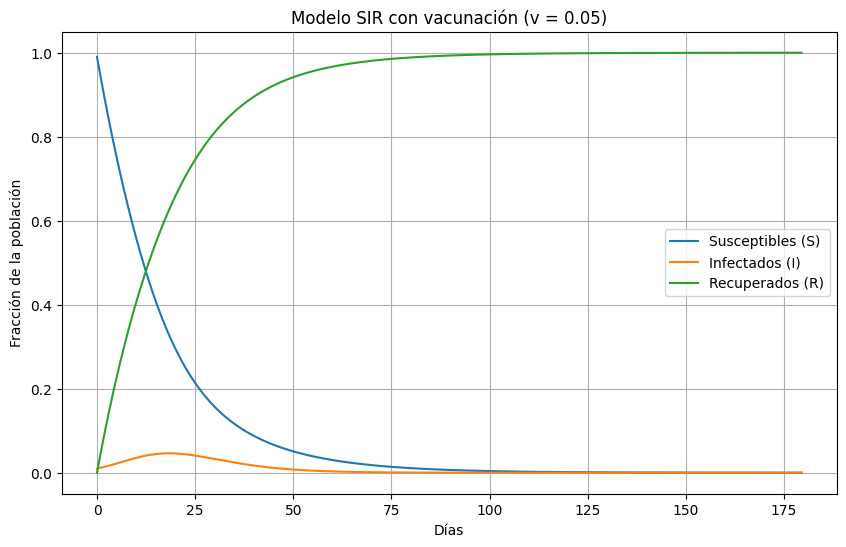

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
beta = 0.3                  # Tasa de infección
gamma = 0.1                 # Tasa de recuperación
v = 0.05                    # Tasa de vacunación
dt = 0.5                    # Paso de tiempo en días
days = 180
steps = int(days / dt)

# Condiciones iniciales
S = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
S[0] = 0.99           # Porcentaje de la población que es susceptible
I[0] = 0.01           # Porcentaje de la población que está infectada     
R[0] = 0.0            # Porcentaje de la población que está recuperada

# Simulación de la epidemia
for t in range(steps - 1):
    dS = -beta * S[t] * I[t] - v * S[t]
    dI = beta * S[t] * I[t] - gamma * I[t]
    dR = gamma * I[t] + v * S[t]
    
    S[t + 1] = S[t] + dS * dt
    I[t + 1] = I[t] + dI * dt
    R[t + 1] = R[t] + dR * dt

# Gráfica
time = np.arange(0, days, dt)
plt.figure(figsize=(10, 6))
plt.plot(time, S, label='Susceptibles (S)')
plt.plot(time, I, label='Infectados (I)')
plt.plot(time, R, label='Recuperados (R)')
plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.title(f'Modelo SIR con vacunación (v = {v})')
plt.legend()
plt.grid(True)
plt.show()


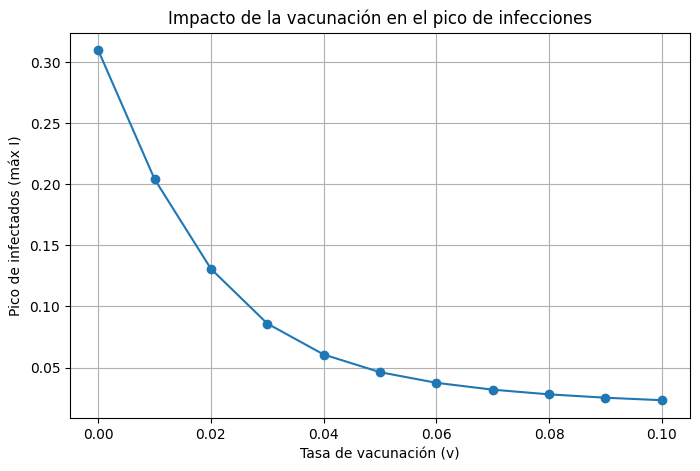

In [2]:
v_values = np.linspace(0, 0.1, 11)
peaks = []

for v in v_values:
    S = np.zeros(steps)
    I = np.zeros(steps)
    R = np.zeros(steps)
    S[0] = 0.99
    I[0] = 0.01
    R[0] = 0.0

    for t in range(steps - 1):
        dS = -beta * S[t] * I[t] - v * S[t]
        dI = beta * S[t] * I[t] - gamma * I[t]
        dR = gamma * I[t] + v * S[t]
        S[t + 1] = S[t] + dS * dt
        I[t + 1] = I[t] + dI * dt
        R[t + 1] = R[t] + dR * dt

    peaks.append(np.max(I))

# Impacto de la vacunación en el pico de infecciones
plt.figure(figsize=(8, 5))
plt.plot(v_values, peaks, marker='o')
plt.xlabel('Tasa de vacunación (v)')
plt.ylabel('Pico de infectados (máx I)')
plt.title('Impacto de la vacunación en el pico de infecciones')
plt.grid(True)
plt.show()


#### 3. Considera y responde
**a. ¿Cómo altera la vacunación los ciclos de retroalimentación?**<br>
La vacunación afecta el bucle de refuerzo al reducir el número de personas S. Por lo tanto, la enfermedad no llega a propagarse de forma exponencial, sino que se mantiene más controlada. 

**b. ¿Cuál es el valor mínimo de v para prevenir un brote?**<br>
Como se puede ver en la segunda gráfica, el pico de infecciones disminuye bastante rápido, según v va aumentando. Al llegar al 0.07 en v, la gráfica se empieza a estabilizar y causa una diferencia bastante mínima. Por lo tanto, 0.07 sería el valor mínimo para prevenir el brote de la enfermedad.

# Ejercicio 3 - Métodos numéricos y aplicaciones en el mundo real 

## Teoría  
Responda a las siguientes preguntas de forma clara  
**1. Compare críticamente:**   
**a. Método de Euler vs. Runge-Kutta para la integración**        
- **i. Contraste la estabilidad de ambos métodos y cómo el tamaño del paso afecta a la estabilidad**

El método de Euler es un método explícito de primer orden y tiene una estabilidad limitada, especialmente cuando se aplica a ecuaciones diferenciales rígidas o cuando se usa un tamaño de paso grande. Su estabilidad depende fuertemente del valor del paso, si este es muy grande puede volverse inestable, dando lugar a soluciones que crecen sin control, incluso cuando la solución exacta es estable.

En cambio, el método de Runge-Kutta también es explícito, pero de cuarto orden, y ofrece una estabilidad significativamente mayor. Aunque no es un método implícito, puede manejar tamaños de paso más grandes sin que la solución se vuelva inestable. Esto permite resolver muchos problemas prácticos con mayor confianza, sin necesidad de pasos extremadamente pequeños. Por tanto, RK4 tiene una región de estabilidad más amplia que el método de Euler, lo que lo hace más robusto para distintos tipos de ecuaciones.

           
**b. Compensación entre precisión y coste computacional.** 

Desde el punto de vista de la precisión, el método de Euler tiene un error local de orden O(h²) y un error global de orden O(h). Esto significa que para obtener una solución razonablemente precisa, es necesario usar pasos muy pequeños. Aunque su costo por paso es muy bajo (solo requiere una evaluación de la función), el número total de pasos necesarios para cubrir un intervalo con buena precisión lo vuelve ineficiente en muchos casos.

El método de Runge-Kutta de cuarto orden, por su parte, tiene un error local de orden O(h⁵) y un error global de orden O(h⁴), lo cual representa una mejora considerable en precisión. Cada paso requiere cuatro evaluaciones de la función, lo que lo hace más costoso por paso que Euler. Sin embargo, se necesitan muchos menos pasos para alcanzar una precisión similar o superior. Esto significa que, en la práctica, RK4 puede ser más eficiente en términos de tiempo total de cómputo y calidad de resultado, a pesar de su mayor coste por iteración.

**2. Explique cómo los retrasos en los ciclos de retroalimentación (p. ej., el retraso en las pruebas durante epidemias) afectan el comportamiento del sistema.**

Los retrazos en los ciclos de retroalimentación afectan profundamente el comportamiento de un sistema dinámico, especialmente durante situaciones críticas como una epidemia. En estos contextos, los retrasos ocurren cuando la información, las decisiones o las acciones no se actualizan en tiempo real. Un ejemplo claro es el retraso en las pruebas diagnósticas: si una persona infectada tarda varios días en recibir su resultado, el sistema pierde visibilidad actual del contagio real. 

Los retrasos en la retroalimentación distorsionan la percepción del estado actual del sistema, provocan respuestas inadecuadas o fuera de fase, y pueden conducir a oscilaciones, colapsos o una mala asignación de recursos en sistemas tan sensibles como el sanitario durante una epidemia.


**3. Proponga un modelo de stock-flujo para:**   
**a. Capacidad hospitalaria durante una epidemia.**  
**b. Incluir las camas de UCI como stock y los ingresos/altas como flujos.**

- Stock: Camas UCI ocupadas

- Flujos:
    - Entrada: Pacientes graves → Ingreso a UCI
    - Salida: Pacientes dados de alta o fallecidos → Alta/fallecimiento

- Parámetros:
    - Tiempo promedio de estancia en UCI
    - Capacidad máxima de camas
    - Tasa de ingreso por contagios

- Retrasos:
    - Tiempo para liberar camas
    - Tiempo para expandir capacidad



**4. Para el Método de Euler**

**a. Indique cómo se define el error local de truncamiento**

El error local de truncamiento del método de Euler se refiere al error cometido en un solo paso del método, asumiendo que el valor inicial en ese paso es exacto. Se debe a la aproximación de la solución de una ecuación diferencial usando una línea recta en lugar de la curva real. Este error es del orden O(h²), donde h es el tamaño del paso.


**b. Enumere dos ventajas y desventajas del método**  
- Ventajas:

    - Simplicidad: Es fácil de entender e implementar, ideal para introducir el concepto de integración numérica.

    - Bajo costo por paso: Solo requiere una evaluación de la función por paso.

- Desventajas:

    - Baja precisión: Tiene error global de orden O(h), lo que implica que se necesitan pasos muy pequeños para obtener soluciones aceptables.

    - Inestabilidad: Es inestable para muchos problemas, especialmente cuando se usan pasos grandes o en sistemas rígidos.

**c. Explique el algoritmo**

El algoritmo del método de Euler se aplica a una ecuación diferencial de la forma:
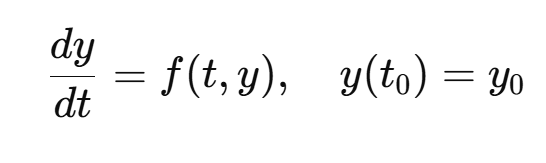  
Se elige un paso h y un intervalo de integración.

A partir del valor inicial 
(𝑡0,𝑦0) ,  se calcula:
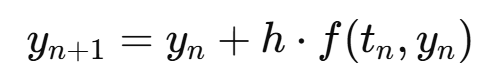  
Se actualiza 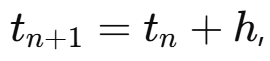, y se repite el proceso.

**5. Para el método de Runge-Kutta (RK4):**  
**a. Explique el algoritmo y principalmente los cuatro pasos intermedios**  
El método RK4 mejora la precisión evaluando la pendiente en varios puntos dentro del intervalo de paso. 
Dado: 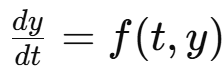:  
1. 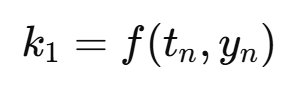
2. 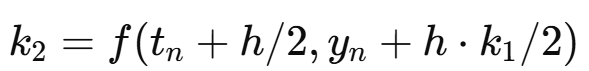
3. 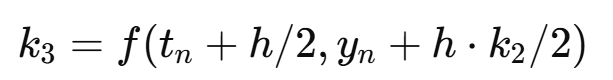 
4. 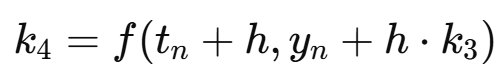 


**b. Compare el error global con el de Euler**  

- El error global del método de Euler es de orden O(h).

- El error global del RK4 es de orden O(h⁴).

Esto significa que, para una misma precisión, RK4 permite usar un paso mucho más grande que Euler, reduciendo el número total de pasos necesarios. 


**c. ¿Cuándo vale la pena utilizar RK4 considerando el costo computacional?**  
Vale la pena utilizar el método de Runge-Kutta de orden 4 (RK4) cuando se requiere una alta precisión en la solución de ecuaciones diferenciales sin necesidad de utilizar pasos extremadamente pequeños. Aunque su costo computacional por paso es mayor, ya que realiza cuatro evaluaciones de la función en cada iteración, esta inversión se compensa al necesitar menos pasos para alcanzar una solución precisa y estable. Por ello, RK4 es especialmente útil en problemas donde el comportamiento del sistema varía suavemente y se prioriza la precisión global, como en simulaciones físicas, biológicas o de ingeniería, siempre que el costo de cálculo por evaluación no sea un factor limitante.






## Práctica
Compare los métodos numéricos (Euler y RK4) para resolver un sistema no lineal

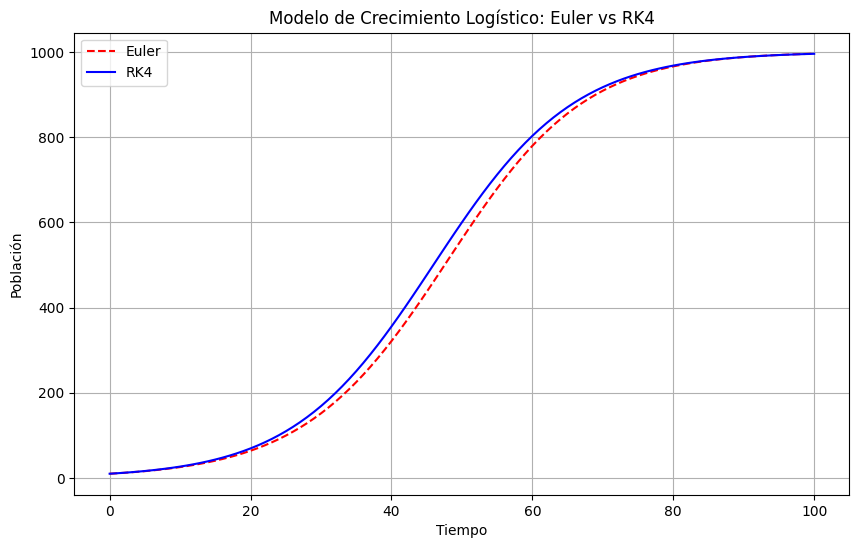

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
r = 0.1
K = 1000
x0 = 10
t_max = 100
h = 1.0  
n_steps = int(t_max / h)

# sistema no lineal 
def f(t, x):
    return r * x * (1 - x / K)

# Inicialización
t_values = np.linspace(0, t_max, n_steps + 1)
x_euler = np.zeros(n_steps + 1)
x_rk4 = np.zeros(n_steps + 1)
x_euler[0] = x0
x_rk4[0] = x0

# Método de Euler
for i in range(n_steps):
    x_euler[i + 1] = x_euler[i] + h * f(t_values[i], x_euler[i])

# Método de Runge-Kutta 4 (RK4)
for i in range(n_steps):
    t = t_values[i]
    x = x_rk4[i]
    
    k1 = f(t, x)
    k2 = f(t + h/2, x + h*k1/2)
    k3 = f(t + h/2, x + h*k2/2)
    k4 = f(t + h, x + h*k3)
    
    x_rk4[i + 1] = x + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

plt.figure(figsize=(10, 6))
plt.plot(t_values, x_euler, label='Euler', linestyle='--', color='red')
plt.plot(t_values, x_rk4, label='RK4', linestyle='-', color='blue')
plt.title('Modelo de Crecimiento Logístico: Euler vs RK4')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()


Prompt utilizado: Genera un código en Python que implemente el modelo de crecimiento logístico con los siguientes parámetros: tasa de crecimiento r = 0.1, capacidad de carga K = 1000, valor inicial x₀ = 10, y horizonte de tiempo de 100 unidades. Usa un paso de integración Δt = 1.0. Implementa dos métodos numéricos: el método de Euler y el método de Runge-Kutta de orden 4 (RK4)

Al código obtenido se añadio la incialización y el sistema no lineal para probar ambos algoritmos, además que se agregaron las gráficas para poder visualizar los resultados 

2. Analice y compare  
a. Error relativo en t=50 para Δt=1.0  

In [6]:
def x_exact(t):
    return K / (1 + ((K - x0) / x0) * np.exp(-r * t))

exact_50 = x_exact(50)
rel_error_euler = abs(x_euler[50] - exact_50) / exact_50
rel_error_rk4 = abs(x_rk4[50] - exact_50) / exact_50

print("Rel error de euler", rel_error_euler)
print("Rel error de rk4",rel_error_rk4)

Rel error de euler 0.06470342144612615
Rel error de rk4 8.061105379231796e-07



**b. Threshold entre tiempo de cómputo y precisión**   

- Euler requiere muchos más pasos (Δt pequeño) para igualar la precisión de RK4 con pocos pasos. Por ejemplo, para alcanzar el error de RK4 con Δt = 1.0, Euler necesita Δt ≈ 0.1 (10 veces más pasos).

- RK4, aunque más costoso por paso (4 evaluaciones), es más eficiente globalmente cuando se busca precisión moderada a alt


**c. Estabilidad con Δt grandes (>5.0)** 

Euler se vuelve numéricamente inestable con pasos grandes, incluso para sistemas no rígidos como el modelo logístico. RK4 es más estable con Δt grandes y puede mantener resultados cualitativamente correctos incluso con Δt = 5, aunque la precisión disminuye.

**3. Considere y responda:**
**a. ¿Qué método mantiene mejor la estabilidad?** 

RK4 mantiene mucho mejor la estabilidad que Euler, especialmente con pasos moderados o grandes. Euler solo es estable con pasos muy pequeños, lo que lo hace poco eficiente para problemas a largo plazo.

**b. ¿Cómo escala el error con Δt en cada método?**

Euler:

Error global: O(h)

Es lineal con el tamaño del paso: reducir a la mitad el paso reduce el error a la mitad.

RK4:

Error global: 
O(h 
4
 )

Mucho más eficiente: reducir el paso a la mitad reduce el error 16 veces

**c. ¿Cuándo convendría elegir Euler en lugar de RK4**  

Usar el método de Euler puede ser conveniente en situaciones donde se prioriza la simplicidad y la rapidez por encima de la precisión. Es útil en simulaciones exploratorias o preliminares, donde se busca entender el comportamiento general del sistema sin necesidad de gran exactitud. También resulta adecuado en entornos con recursos computacionales limitados, ya que su costo por paso es muy bajo. En contextos educativos, Euler permite ilustrar de forma clara los fundamentos de la integración numérica. Además, en sistemas lineales simples o simulaciones de corto plazo, donde el error acumulado no crece significativamente, puede ofrecer resultados aceptables con menor complejidad.
